<a href="https://colab.research.google.com/github/krakowiakpawel9/ml_course/blob/master/cont/07_decision_tree_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression

sns.set()
np.random.seed(42)
np.set_printoptions(precision=6, suppress=True)

data, target = make_regression(n_samples=200, n_features=1, noise=20)
target = target ** 2
print(data[:5], '\n')
print(target[:5])

[[ 1.852278]
 [ 0.473592]
 [-1.230864]
 [ 0.625667]
 [-0.07201 ]] 

[18795.440426  3481.301662  5866.345958  3697.116539    78.964854]


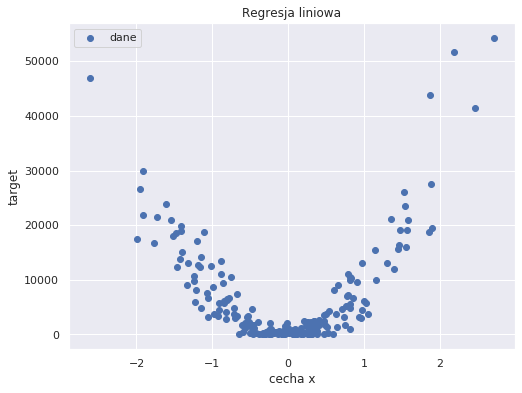

In [2]:
plt.figure(figsize=(8, 6))
plt.title('Regresja liniowa')
plt.scatter(data, target, label='dane')
plt.legend()
plt.xlabel('cecha x')
plt.ylabel('target')
plt.show()

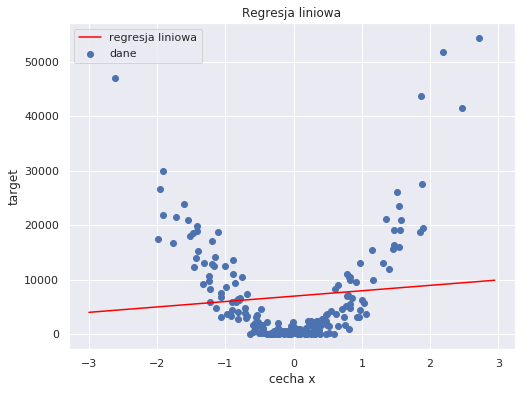

In [3]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(data, target)

plot_data = np.arange(-3, 3, 0.05).reshape(-1, 1)

plt.figure(figsize=(8, 6))
plt.title('Regresja liniowa')
plt.plot(plot_data, regressor.predict(plot_data), c='red', label='regresja liniowa')
plt.scatter(data, target, label='dane')
plt.legend()
plt.xlabel('cecha x')
plt.ylabel('target')
plt.show()

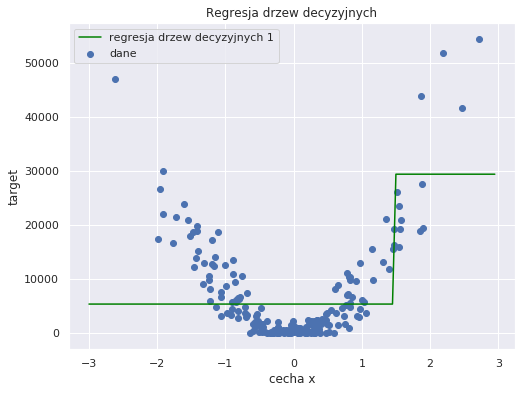

In [4]:
from sklearn.tree import DecisionTreeRegressor

max_depth = 1
tree = DecisionTreeRegressor(max_depth=max_depth)
tree.fit(data, target)

plt.figure(figsize=(8, 6))
plt.title('Regresja drzew decyzyjnych')
plt.plot(plot_data, tree.predict(plot_data), c='green', label=f'regresja drzew decyzyjnych {max_depth}')
plt.scatter(data, target, label='dane')
plt.legend()
plt.xlabel('cecha x')
plt.ylabel('target')
plt.show()

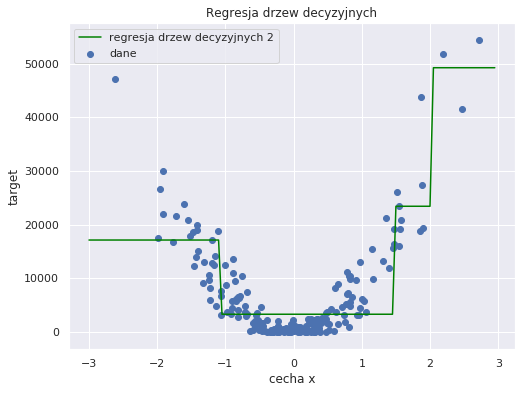

In [5]:
max_depth = 2
tree = DecisionTreeRegressor(max_depth=max_depth)
tree.fit(data, target)

plt.figure(figsize=(8, 6))
plt.title('Regresja drzew decyzyjnych')
plt.plot(plot_data, tree.predict(plot_data), c='green', label=f'regresja drzew decyzyjnych {max_depth}')
plt.scatter(data, target, label='dane')
plt.legend()
plt.xlabel('cecha x')
plt.ylabel('target')
plt.show()

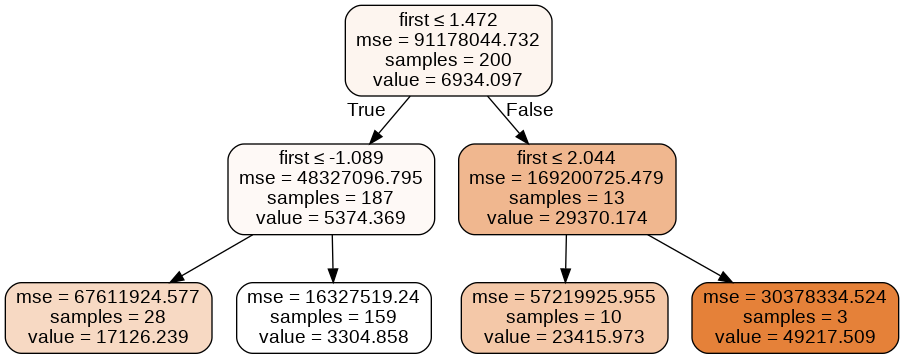

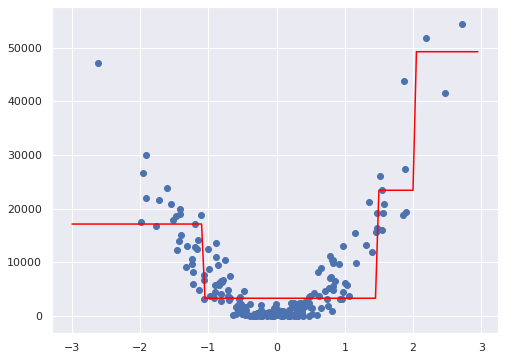

In [12]:
def make_dt_regression(max_depth=2):
    regressor = DecisionTreeRegressor(max_depth=max_depth)
    regressor.fit(data, target)

    plt.figure(figsize=(8, 6))
    plt.plot(plot_data, regressor.predict(plot_data), c='red')
    plt.scatter(data, target)

    from sklearn.tree import export_graphviz
    from sklearn.externals.six import StringIO
    from IPython.display import Image
    import pydotplus

    dot_data = StringIO()
    export_graphviz(regressor, out_file=dot_data,
                   filled=True, rounded=True,
                   special_characters=True,
                   feature_names=['first'])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    graph.write_png('graph.png')
    return Image(graph.create_png(), width=150 + max_depth * 100)
    
make_dt_regression(max_depth=2)    

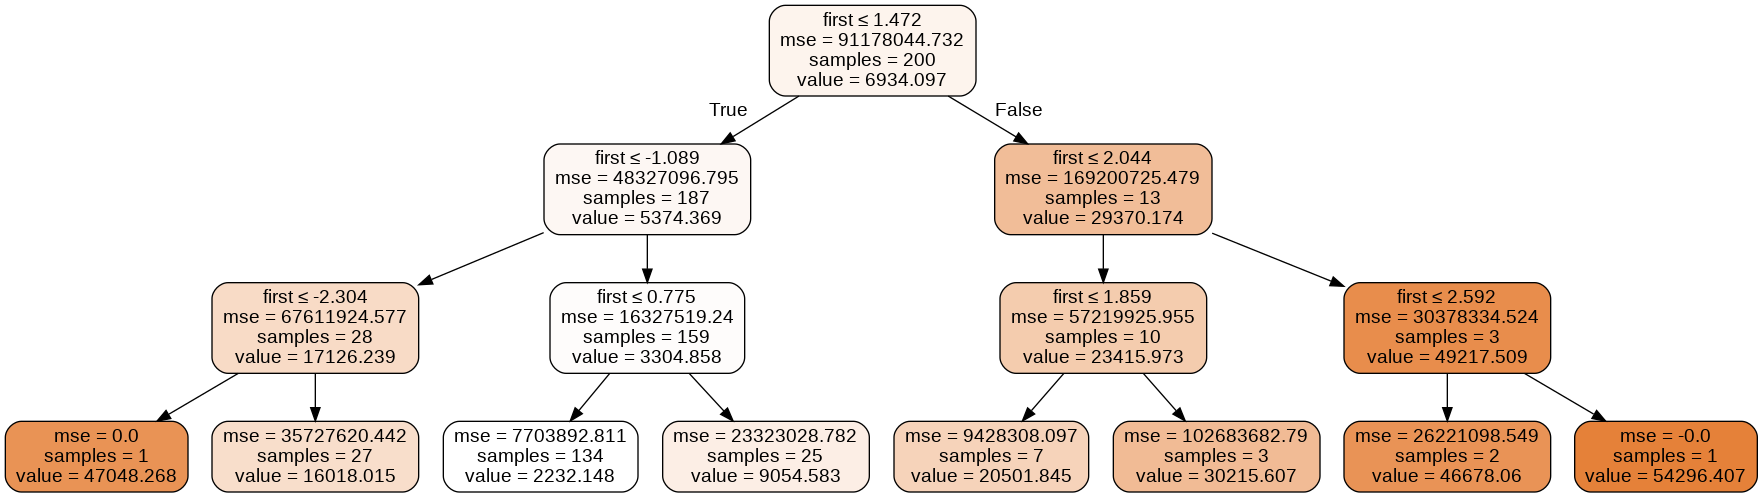

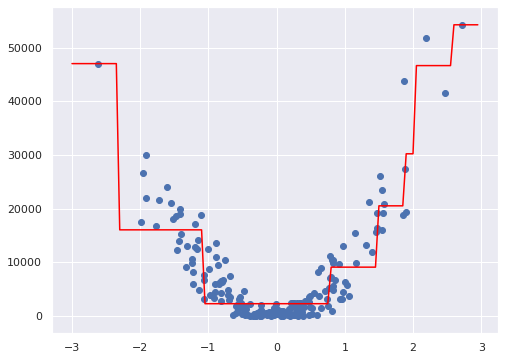

In [13]:
make_dt_regression(max_depth=3)

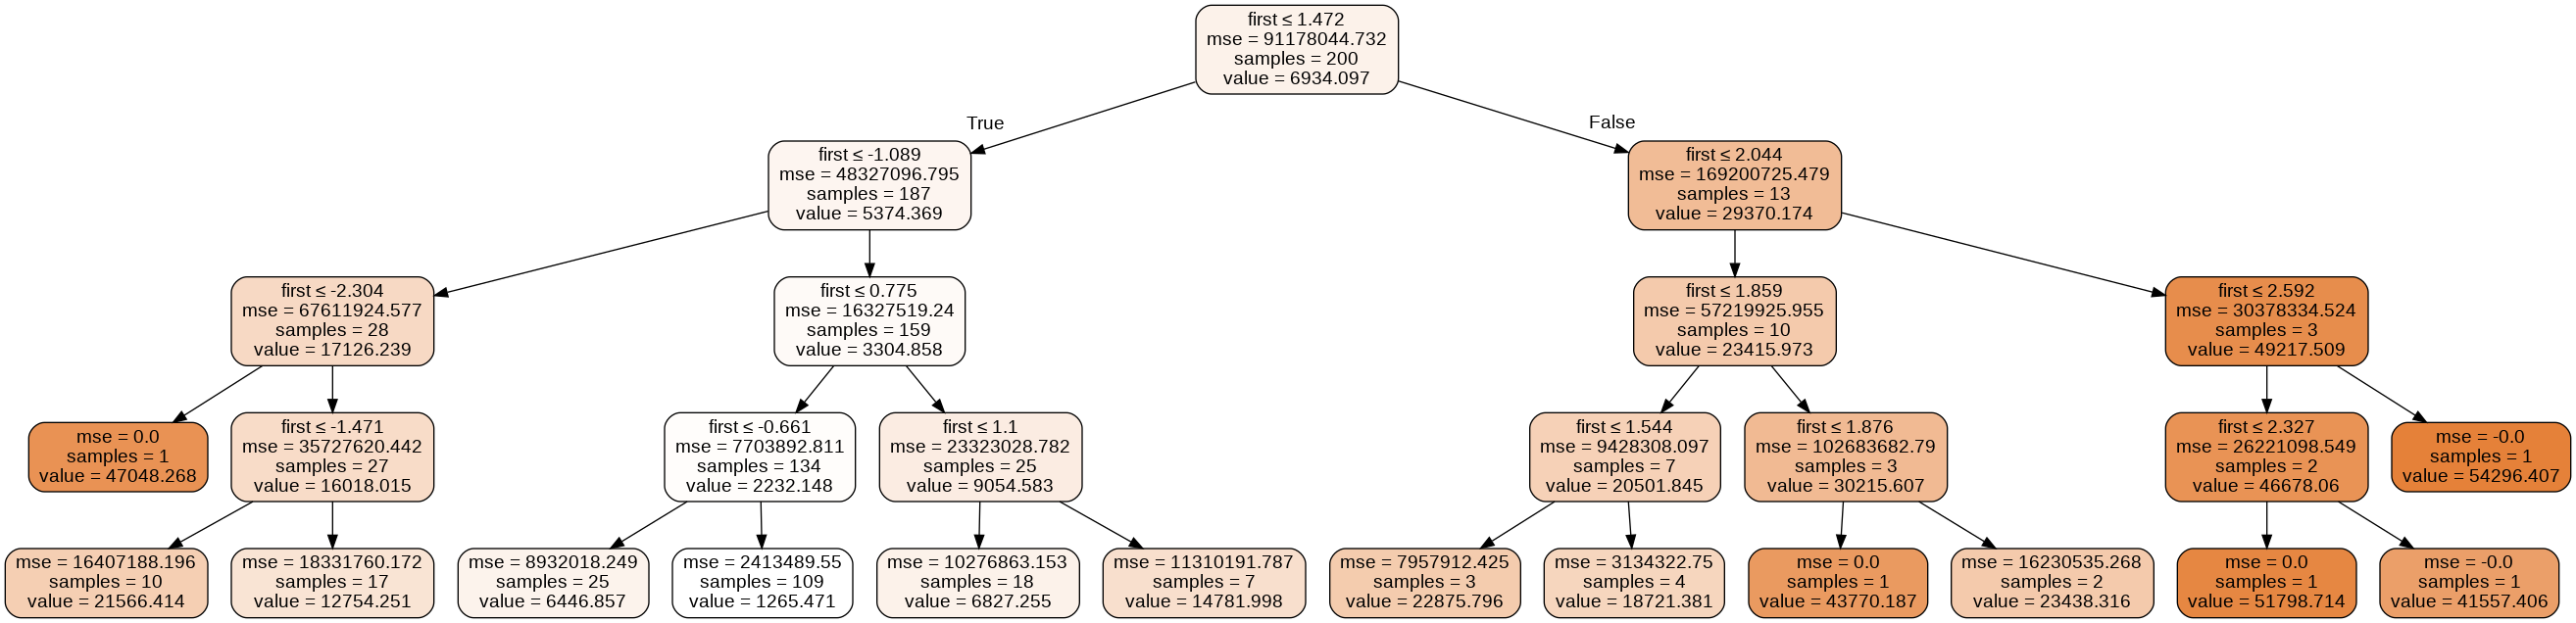

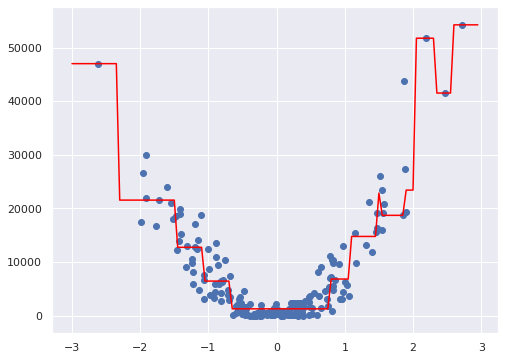

In [14]:
make_dt_regression(max_depth=4)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


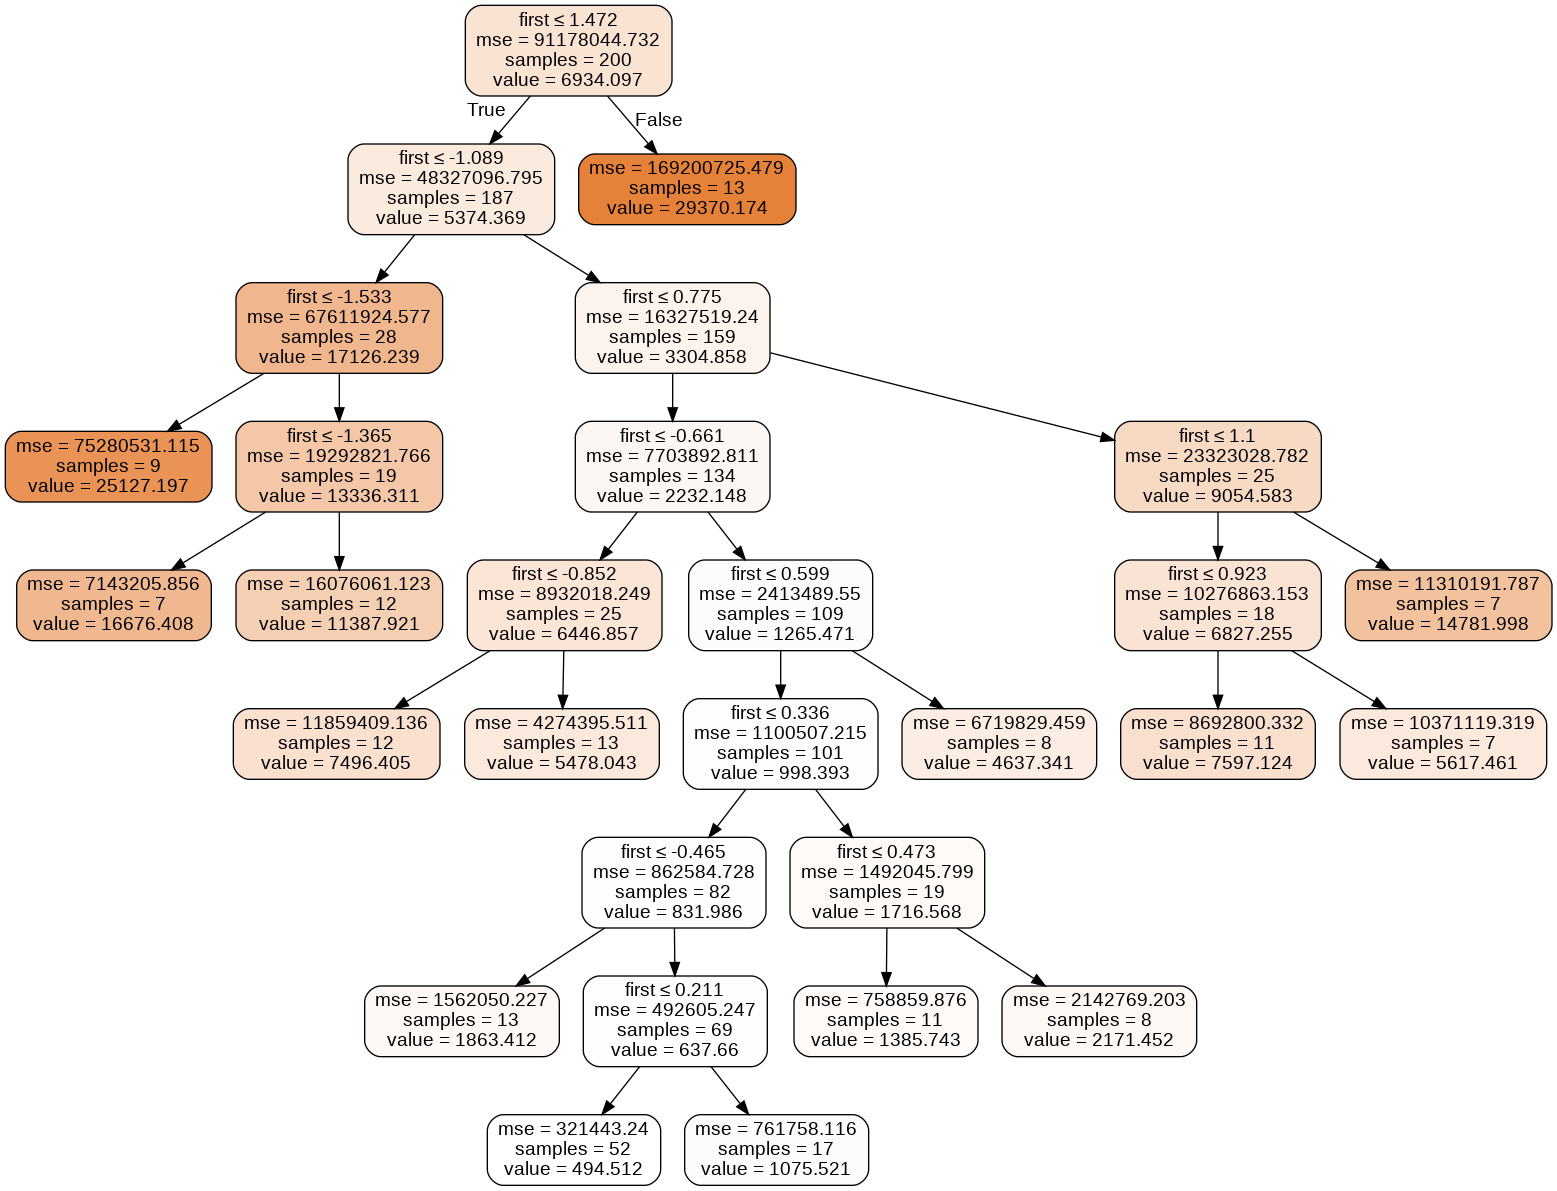

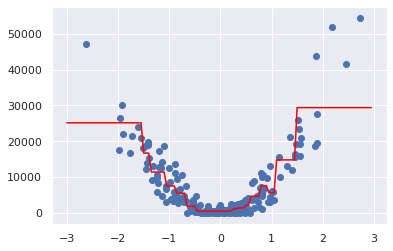

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

param_grid = [{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
              'min_samples_leaf': [6, 7, 8, 9, 10, 11]}]

reg = DecisionTreeRegressor()

gs = GridSearchCV(reg, param_grid=param_grid, scoring='r2', n_jobs=-1)
gs.fit(data, target)

model = gs.best_estimator_

plt.plot(plot_data, model.predict(plot_data), c='red')
plt.scatter(data, target)  

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(model, out_file=dot_data,
               filled=True, rounded=True,
               special_characters=True,
               feature_names=['first'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('graph.png')
Image(graph.create_png(), width=150 + gs.best_params_['max_depth'] * 100)

In [16]:
gs.best_params_

{'max_depth': 8, 'min_samples_leaf': 7}